In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import iris dataset to play with
iris = datasets.load_iris()

In [3]:
#understanding available features about the dataset
type(iris)

sklearn.utils.Bunch

In [4]:
print('measurememnt data details: ', iris.feature_names)
print('species in iris dataset are :', iris.target_names)
print('shape of iris data is : ', iris.data.shape)

measurememnt data details:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
species in iris dataset are : ['setosa' 'versicolor' 'virginica']
shape of iris data is :  (150, 4)


In [5]:
X = iris.data[:, :4]
y = iris.target

Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')

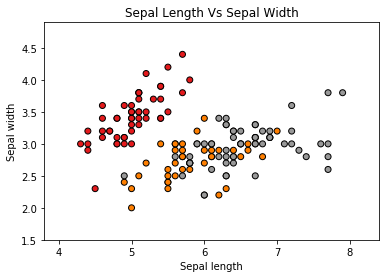

In [6]:
#plotting data before classification
#observing 2d plot for sepal width vs sepal length
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.title("Sepal Length Vs Sepal Width")

Text(0.5, 1.0, 'Petal Length Vs Petal Width')

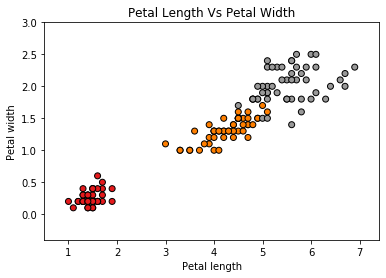

In [7]:
#observing 2d plot for petal width vs petal length
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.title("Petal Length Vs Petal Width")

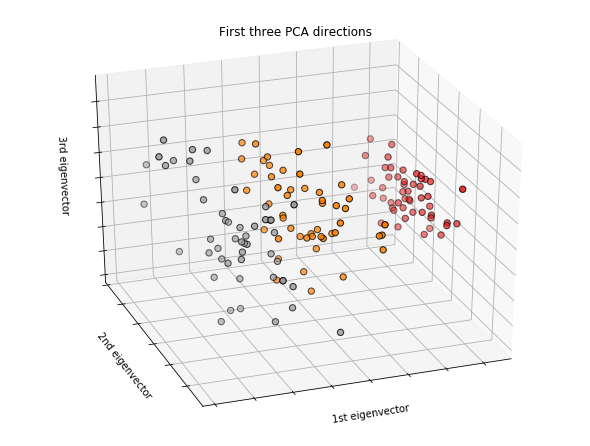

In [8]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))


accuracy: 0.98


In [11]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 7


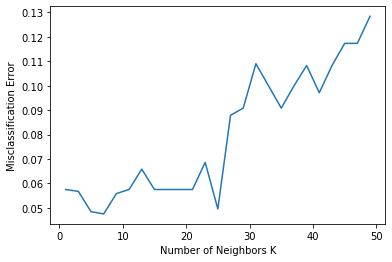

In [12]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()
